In [1]:
# Импорт базовых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


# Загрузка набора данных «breast_cancer»
iris = load_iris()


# Получение массива названий признаков объектов
feature_names = iris.feature_names


# Создание датафрейма с признаками объектов
x = pd.DataFrame(iris.data, columns=feature_names)
y = pd.DataFrame(iris.target, columns=['class'])


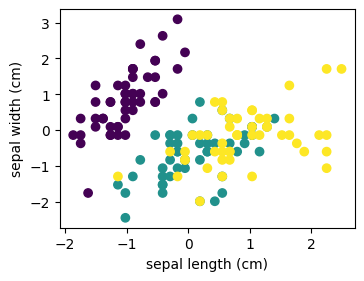

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
# В первую очередь, необходимо масштабировать все признаки, чтобы они имели
# одинаковую значимость
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x, columns=feature_names)


# Признаковое пространство после масштабирования
fig = plt.figure()
for i in range(4):
    axs = fig.add_subplot(2, 2, i+1,
                          xlabel=feature_names[i % 4],
                          ylabel=feature_names[(i+1) % 4])
    gph = axs.scatter(x[feature_names[i % 4]],
                      x[feature_names[(i+1) % 4]],
                      c=np.array(y))
    plt.tight_layout(pad=0)
    plt.show()

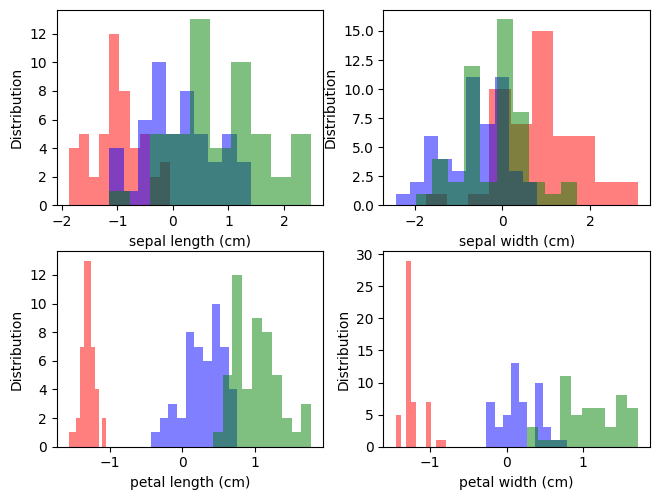

In [3]:
# Распределение признаков по сортам после масштабирования
fig = plt.figure()
for i in range(4):
    axs = fig.add_subplot(2, 2, i + 1,
                          xlabel=feature_names[i], ylabel='Distribution')
    gph = axs.hist(x.loc[y['class'] == 0, feature_names[i]],
                   bins=10, color='r', alpha=0.5)
    gph = axs.hist(x.loc[y['class'] == 1, feature_names[i]],
                   bins=10, color='b', alpha=0.5)
    gph = axs.hist(x.loc[y['class'] == 2, feature_names[i]],
                   bins=10, color='g', alpha=0.5)
    plt.tight_layout(pad=0)
plt.show()


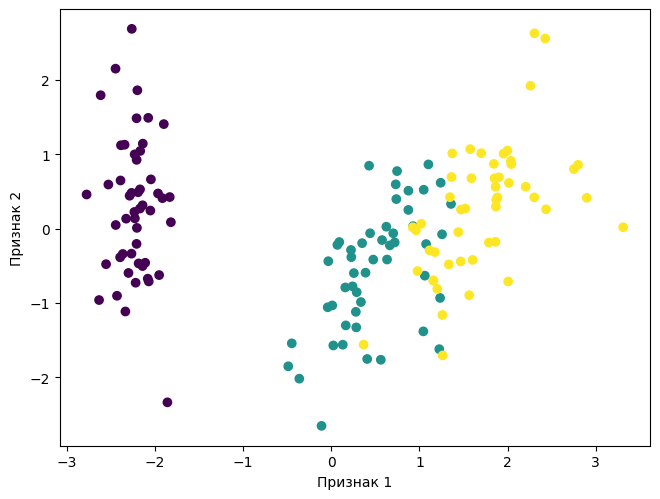

In [4]:
# Теперь нам необходимо создать модель, реализующую метод PCA
# Импортируем класс PCA
from sklearn.decomposition import PCA


# Создадим модель этого класса
# n_components - сколько важных признаков оставить в новом призн. пространстве
pca = PCA(n_components=2)


# Подгоняем параметры нашей модели под наши данные X
pca.fit(x)


# Применяем метод PCA к нашим данным X и получаем новое признаковое пространство
x_new = pca.transform(x)
x_new = pd.DataFrame(x_new)


# Теперь посмотрим на взаимосвязь наших новых 2 признаков
fig = plt.figure()
axs = fig.add_subplot(xlabel='Признак 1', ylabel='Признак 2')
gph = axs.scatter(x_new.iloc[:, 0], x_new.iloc[:, 1], c=np.array(y))
plt.tight_layout(pad=0)
plt.show()


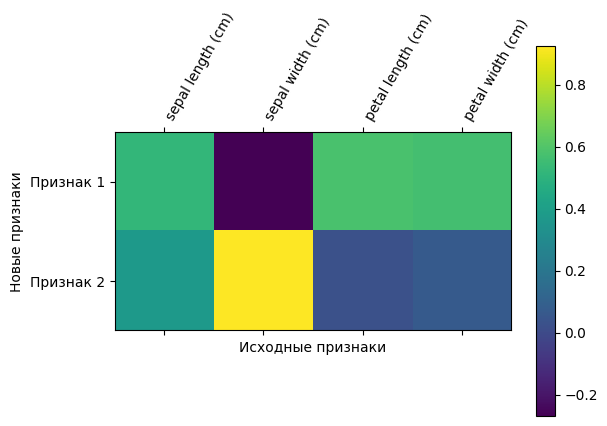

In [5]:
# Мы получили 2 признака, несущие в себе наибольшую статистически важную
# информацию о наборе данных, а также получили взаимосвязь этих признаков
# Эти новые признаки (признаки нового признакового пространства) называются
# главными компонентами
# С помощью графика корреляций, можем посмотреть, насколько сильно наши новые
# признаки зависят от каждого из старых признаков
fig = plt.figure()
axs = fig.add_subplot(ylabel='Новые признаки', xlabel='Исходные признаки')
gph = axs.matshow(pca.components_, cmap='viridis')
plt.yticks(range(2), ['Признак 1', 'Признак 2'])
plt.xticks(range(4), feature_names, rotation=60, ha='left')
fig.colorbar(gph)
